In [1]:
import pandas as pd
from collections import *
import numpy as np
from tqdm import tqdm
import csv

## 0. Get to know the data.

### Read data from 1/1/20-1/31/20

In [2]:
bing_query = pd.read_csv("data/QueriesByState_2020-01-01_2020-01-31.tsv",sep="\t")
query_list = Counter(bing_query["Query"])

In [5]:
df1 = bing_query[bing_query['Country'] == 'United States']

In [3]:
bing_query.keys()

Index(['Date', 'Query', 'IsImplicitIntent', 'State', 'Country',
       'PopularityScore'],
      dtype='object')

In [4]:
len(query_list)

2075

In [5]:
size  = [len(i) for i in query_list]
np.mean((size))

22.091084337349397

There are 2075 unique query searched during this time period. The average length of the query is 22 character per word.

In [6]:
query_list.most_common(20)

[('coronavirus', 6749),
 ('corona virus', 2781),
 ('coronavirus symptoms', 1534),
 ('wuhan coronavirus', 803),
 ('corona virus update', 792),
 ('コロナウイルス', 730),
 ('coronavirus china', 729),
 ('what is coronavirus', 725),
 ('china virus', 690),
 ('symptoms of coronavirus', 616),
 ('china coronavirus', 527),
 ('cdc coronavirus', 498),
 ('wuhan virus', 488),
 ('novel coronavirus', 466),
 ('what is the coronavirus', 445),
 ('coronovirus', 427),
 ('coronavirus update', 398),
 ('coronavirus news', 379),
 ('n95 mask', 370),
 ('冠状病毒', 366)]

The top 20 popular key word searched in January, 2020.

In [6]:
bing_query

,Date,Query,IsImplicitIntent,State,Country,PopularityScore
0,2020-01-01,coronavirus,False,Michigan,United States,1
1,2020-01-01,coronavirus,False,Pennsylvania,United States,1
2,2020-01-01,p2 masks,True,Australian Capital Territory,Australia,1
3,2020-01-01,auswärtiges amt,True,North Rhine-Westphalia,Germany,1
4,2020-01-01,p2 masks,True,New South Wales,Australia,1
...,...,...,...,...,...,...
39931,2020-01-31,coronavirus thailande,False,Ile-De-France,France,1
39932,2020-01-31,coronavirus,False,Zeeland,Netherlands,1
39933,2020-01-31,coronavirus in deutschland,False,Hesse,Germany,1
39934,2020-01-31,coronavirus,False,Delaware,United States,100


In [7]:
bing_query_US = bing_query[bing_query["Country"]=="United States"]

In [8]:
len(bing_query_US)

17338

In [9]:
len(Counter(bing_query_US["Query"]))

1111

There are 17,338 searching results searched by people living in the United States. There are 1111 unique query generated.

### Extract US data from the whole dataset.

In [10]:
sort_US = bing_query_US.sort_values("State")
sort_US

,Date,Query,IsImplicitIntent,State,Country,PopularityScore
38570,2020-01-31,coronavirus in us,False,Alabama,United States,2
13092,2020-01-26,coronavirus,False,Alabama,United States,100
17546,2020-01-27,corona virus update,False,Alabama,United States,13
38514,2020-01-31,cdc coronavirus,False,Alabama,United States,8
38522,2020-01-31,china coronavirus,False,Alabama,United States,3
...,...,...,...,...,...,...
30310,2020-01-30,coronavirus,False,Wyoming,United States,100
30328,2020-01-30,coronavirus symptoms,False,Wyoming,United States,14
30346,2020-01-30,world health organization coronavirus,False,Wyoming,United States,1
27810,2020-01-29,coronavirus in united states,False,Wyoming,United States,1


In [11]:
state_list = list(bing_query_US.State.unique())
len(state_list)

51

In [41]:
state_query_popular = {}
for i in range(len(sort_US)):
    state = sort_US.iloc[i]["State"]
    score = sort_US.iloc[i]["PopularityScore"]
    query = sort_US.iloc[i]["Query"]
    if state not in state_query_popular:
        state_query_popular[state] = []
        state_query_popular[state].append("{}({})".format(query,score))
        # state_query_popular[state]["query"] = query
        # state_query_popular[state]["score"] = score
    else:
        # state_query_popular[state]["query"] = query
        # state_query_popular[state]["score"] = score
        state_query_popular[state].append("{}({})".format(query,score))

In [44]:
Counter(state_query_popular["Alabama"]).most_common(5)

[('coronavirus(100)', 11),
 ('coronavirus(1)', 5),
 ('wuhan virus(2)', 5),
 ('coronavirus news(1)', 5),
 ('what is coronavirus(5)', 5),
 ('sars virus(1)', 4),
 ('coronovirus(1)', 4),
 ('coronavirus china(1)', 4),
 ('cdc coronavirus(8)', 3),
 ('china coronavirus(3)', 3),
 ('corona virus(13)', 3),
 ('coronavirus in usa(1)', 3),
 ('symptoms of coronavirus(2)', 3),
 ('wuhan coronavirus(2)', 3),
 ('wuhan coronavirus(3)', 3),
 ('coronavirus symptoms(15)', 3),
 ('coronavirus in united states(1)', 3),
 ('what is the coronavirus(3)', 3),
 ('n95 mask(1)', 3),
 ('bat soup(1)', 3),
 ('what is the coronavirus(1)', 3),
 ('coronavirus in us(2)', 2),
 ('corona virus in adults(1)', 2),
 ('china virus(4)', 2),
 ('coronavirus cases china(1)', 2),
 ('corona virus china(1)', 2),
 ('coronovirus(2)', 2),
 ('symptoms of coronavirus(3)', 2),
 ('coronavirus in us(1)', 2),
 ('coronavirus infection(1)', 2),
 ('china coronavirus(1)', 2),
 ('coronavirus symptoms(18)', 2),
 ('coronavirus china(5)', 2),
 ('coronaviru

## 1. Combine and generate US data.

### 1.1 Write a function to extract US data from each file by month.

In [25]:
def get_US_data(filename):
    bing_query = pd.read_csv(filename,sep="\t")
    bing_query_US = bing_query[bing_query["Country"]=="United States"]
    return bing_query_US

### 1.2 Combine US_2020 data.

In [26]:
filename_list = ["data/QueriesByState_2020-02-01_2020-02-29.tsv", "data/QueriesByState_2020-03-01_2020-03-31.tsv", "data/QueriesByState_2020-04-01_2020-04-30.tsv", "data/QueriesByState_2020-05-01_2020-05-31.tsv", "data/QueriesByState_2020-06-01_2020-06-30.tsv", "data/QueriesByState_2020-07-01_2020-07-31.tsv", "data/QueriesByState_2020-08-01_2020-08-31.tsv", "data/QueriesByState_2020-09-01_2020-09-30.tsv", "data/QueriesByState_2020-10-01_2020-10-31.tsv", "data/QueriesByState_2020-11-01_2020-11-30.tsv"]

In [27]:
US_2020_data = get_US_data("data/QueriesByState_2020-01-01_2020-01-31.tsv")
for i in tqdm(filename_list):
    US_data = get_US_data(i)
    US_2020_data = pd.concat([US_2020_data, US_data])
US_2020_data

100%|██████████| 10/10 [00:05<00:00,  1.98it/s]


,Date,Query,IsImplicitIntent,State,Country,PopularityScore
0,2020-01-01,coronavirus,False,Michigan,United States,1
1,2020-01-01,coronavirus,False,Pennsylvania,United States,1
5,2020-01-02,coronavirus,False,California,United States,67
7,2020-01-02,coronavirus,False,Ohio,United States,1
8,2020-01-02,corona virus,False,California,United States,100
...,...,...,...,...,...,...
513559,2020-11-30,ny travel restrictions,True,New York,United States,2
513562,2020-11-30,matt gaetz,True,Tennessee,United States,1
513563,2020-11-30,herd immunity,True,Pennsylvania,United States,1
513571,2020-11-30,patrick mahomes,True,Kentucky,United States,1


In [28]:
tsv_file = open("data/QueriesByState_2020-12-01_2020-12-31.tsv")
read_tsv = csv.reader(tsv_file, delimiter="\t")

clean_row = []
for row in read_tsv:
    if len(row) == 6 and row[4] == 'United States':
        clean_row.append(row)
dec_2020_data = pd.DataFrame(clean_row, columns=['Date', 'Query', 'IsImplicitIntent', 'State', 'Country',
       'PopularityScore'])    

In [29]:
dec_2020_data

,Date,Query,IsImplicitIntent,State,Country,PopularityScore
0,2020-12-01,coronavirus tracker,False,Texas,United States,1
1,2020-12-01,covid update,False,New Jersey,United States,1
2,2020-12-01,are we getting another stimulus check,True,New York,United States,1
3,2020-12-01,salvation army donations,True,South Carolina,United States,2
4,2020-12-01,mnp,True,Wisconsin,United States,1
...,...,...,...,...,...,...
1547299,2020-12-31,coronavirus statistics in california,False,California,United States,1
1547300,2020-12-31,uhc provider login,True,Maryland,United States,2
1547301,2020-12-31,coronavirus statistics in united states,False,California,United States,1
1547302,2020-12-31,coronavirus stats,False,California,United States,1


In [30]:
US_2020_data = pd.concat([US_2020_data, dec_2020_data])
US_2020_data

,Date,Query,IsImplicitIntent,State,Country,PopularityScore
0,2020-01-01,coronavirus,False,Michigan,United States,1
1,2020-01-01,coronavirus,False,Pennsylvania,United States,1
5,2020-01-02,coronavirus,False,California,United States,67
7,2020-01-02,coronavirus,False,Ohio,United States,1
8,2020-01-02,corona virus,False,California,United States,100
...,...,...,...,...,...,...
1547299,2020-12-31,coronavirus statistics in california,False,California,United States,1
1547300,2020-12-31,uhc provider login,True,Maryland,United States,2
1547301,2020-12-31,coronavirus statistics in united states,False,California,United States,1
1547302,2020-12-31,coronavirus stats,False,California,United States,1


In [31]:
US_2020_data.to_csv("2020_Bing_US_data.csv")

### 1.3 Combine US_2021 data.

In [32]:
filename_list_2 = ["data/QueriesByState_2021-02-01_2021-02-28.tsv", "data/QueriesByState_2021-03-01_2021-03-31.tsv", "data/QueriesByState_2021-04-01_2021-04-30.tsv", "data/QueriesByState_2021-05-01_2021-05-31.tsv", "data/QueriesByState_2021-06-01_2021-06-30.tsv"]

In [33]:
US_2021_data = get_US_data("data/QueriesByState_2021-01-01_2021-01-31.tsv")
for i in tqdm(filename_list_2):
    US_data = get_US_data(i)
    US_2021_data = pd.concat([US_2021_data, US_data])
US_2021_data

100%|██████████| 5/5 [00:02<00:00,  1.95it/s]


,Date,Query,IsImplicitIntent,State,Country,PopularityScore
0,2021-01-01,bamlanivimab,True,Illinois,United States,2
1,2021-01-01,coronavirus update,False,Illinois,United States,11
2,2021-01-01,covid testing sites near me,False,Arizona,United States,5
3,2021-01-01,coronavirus cases,False,Massachusetts,United States,8
5,2021-01-01,covid 19 symptoms,False,Georgia,United States,9
...,...,...,...,...,...,...
484975,2021-06-30,vams portal,True,Virginia,United States,2
484979,2021-06-30,cdc mask guidelines,True,California,United States,3
484980,2021-06-30,top news local,True,Arkansas,United States,7
484982,2021-06-30,stimulus update,True,Arkansas,United States,7


In [34]:
tsv_file = open("data/QueriesByState_2021-07-01_2021-07-31.tsv",encoding='latin-1')
read_tsv = csv.reader(tsv_file, delimiter="\t")

clean_row = []
for row in read_tsv:
    if len(row) == 6 and row[4] == 'United States':
        clean_row.append(row)
july_2021_data = pd.DataFrame(clean_row, columns=['Date', 'Query', 'IsImplicitIntent', 'State', 'Country',
       'PopularityScore'])    

In [35]:
US_2021_data = pd.concat([US_2021_data, july_2021_data])
US_2021_data

,Date,Query,IsImplicitIntent,State,Country,PopularityScore
0,2021-01-01,bamlanivimab,True,Illinois,United States,2
1,2021-01-01,coronavirus update,False,Illinois,United States,11
2,2021-01-01,covid testing sites near me,False,Arizona,United States,5
3,2021-01-01,coronavirus cases,False,Massachusetts,United States,8
5,2021-01-01,covid 19 symptoms,False,Georgia,United States,9
...,...,...,...,...,...,...
869060,2021-07-31,covid deaths usa,False,Pennsylvania,United States,3
869061,2021-07-31,indeed job search,True,Maryland,United States,5
869062,2021-07-31,oregon mask mandate update,True,Oregon,United States,11
869063,2021-07-31,irs stimulus check,True,Texas,United States,3


In [36]:
US_2021_data.to_csv("2021_Bing_US_data.csv")

### 1.4 Get whole US_Bing_data.

In [37]:
US_Bing_data = pd.concat([US_2020_data, US_2021_data])
US_Bing_data

,Date,Query,IsImplicitIntent,State,Country,PopularityScore
0,2020-01-01,coronavirus,False,Michigan,United States,1
1,2020-01-01,coronavirus,False,Pennsylvania,United States,1
5,2020-01-02,coronavirus,False,California,United States,67
7,2020-01-02,coronavirus,False,Ohio,United States,1
8,2020-01-02,corona virus,False,California,United States,100
...,...,...,...,...,...,...
869060,2021-07-31,covid deaths usa,False,Pennsylvania,United States,3
869061,2021-07-31,indeed job search,True,Maryland,United States,5
869062,2021-07-31,oregon mask mandate update,True,Oregon,United States,11
869063,2021-07-31,irs stimulus check,True,Texas,United States,3


In [39]:
US_Bing_data.to_csv("US_Bing_data.csv")

# 2. Information Retrival.

In [2]:
US_Bing_data = pd.read_csv("US_Bing_data.csv",index_col="Unnamed: 0")

In [4]:
US_Bing_data = US_Bing_data.reset_index(drop=True)
US_Bing_data.tail(5)

,Date,Query,IsImplicitIntent,State,Country,PopularityScore
5866937,2021-07-31,covid deaths usa,False,Pennsylvania,United States,3
5866938,2021-07-31,indeed job search,True,Maryland,United States,5
5866939,2021-07-31,oregon mask mandate update,True,Oregon,United States,11
5866940,2021-07-31,irs stimulus check,True,Texas,United States,3
5866941,2021-07-31,coronavirus updates,False,Missouri,United States,3


In [5]:
US_Bing_data.shape

(5866942, 6)

### 2.1 When was the word "vaccine" first been searched in US?

In [45]:
for i in range(len(US_Bing_data)):
    query = US_Bing_data.iloc[i]["Query"]
    if "vaccine" in query:
        print(US_Bing_data.iloc[i])
        break

Date                         2020-01-21
Query               coronavirus vaccine
IsImplicitIntent                  False
State                           Florida
Country                   United States
PopularityScore                       1
Name: 2415, dtype: object


### 2.2 What are query frequently mentioned all over the country in different time period?

In [59]:
date = [0, 600000, 1500000, 2000000, 3800000, 4500000, len(US_Bing_data)-1]

for j in range(6):
    start = date[j]
    end = date[j+1]
    print("The top 10 frequent searched on Bing from {} to {} are:".format(US_Bing_data.iloc[start]["Date"], US_Bing_data.iloc[end]["Date"]))
    print(list(Counter(US_Bing_data[start:end]["Query"]).most_common(10)))
    print("--------------------------------------------------------")
        

The top 10 frequent searched on Bing from 2020-01-01 to 2020-03-31 are:
[('coronavirus', 3963), ('coronavirus symptoms', 3410), ('corona virus', 3379), ('corona virus update', 3322), ('coronavirus update', 3229), ('symptoms of coronavirus', 2771), ('cdc coronavirus', 2755), ('coronavirus map', 2747), ('cdc coronavirus update', 2423), ('corona virus map', 2258)]
--------------------------------------------------------
The top 10 frequent searched on Bing from 2020-03-31 to 2020-07-10 are:
[('coronavirus update', 5136), ('coronavirus', 5115), ('covid 19 update', 5102), ('coronavirus updates', 4992), ('worldometer coronavirus', 4989), ('coronavirus map', 4898), ('cdc coronavirus update', 4819), ('johns hopkins coronavirus dashboard', 4744), ('covid 19', 4715), ('stimulus checks', 4583)]
--------------------------------------------------------
The top 10 frequent searched on Bing from 2020-07-10 to 2020-10-01 are:
[('coronavirus update', 4235), ('stimulus check 2', 4221), ('coronavirus', 4

Interesting findings:       
2020-01-01 to 2020-03-31: all about coronavirus, coronavirus symptoms            
2020-03-31 to 2020-07-10: update coronavirus, coronavirus map, first mentioned stimulus check         
2020-07-10 to 2020-10-01: second stimulus check, at&t and sam's club         
2020-10-01 to 2020-12-28: trump twitter/news, costco online           
2020-12-28 to 2021-03-21: covid vaccine, get my payment(?)         
2021-03-21 to 2021-07-31: delta variant, indeed job search, covid vaccine             

### 2.3 What are hot topic searched in different state.

Democratic state.

In [3]:
CA_Bing_data = US_Bing_data[US_Bing_data["State"]=="California"]
CA_Bing_data

,Date,Query,IsImplicitIntent,State,Country,PopularityScore
5,2020-01-02,coronavirus,False,California,United States,67
8,2020-01-02,corona virus,False,California,United States,100
19,2020-01-02,n95 mask,True,California,United States,1
39,2020-01-03,coronavirus,False,California,United States,100
41,2020-01-03,corona virus,False,California,United States,1
...,...,...,...,...,...,...
869028,2021-07-31,corona virus zone rosse,False,California,United States,1
869036,2021-07-31,myvaccinerecord cdph ca gov,True,California,United States,5
869044,2021-07-31,florida covid cases,False,California,United States,14
869050,2021-07-31,coronavirus,False,California,United States,9


In [4]:
Counter(CA_Bing_data["Query"]).most_common(10)

[('coronavirus', 1027),
 ('coronavirus update', 1008),
 ('coronavirus updates', 1006),
 ('coronavirus map', 1006),
 ('cdc coronavirus update', 1000),
 ('coronavirus california', 997),
 ('tucker carlson', 992),
 ('coronavirus statistics', 990),
 ('california coronavirus', 988),
 ('worldometer coronavirus', 981)]

In [5]:
NY_Bing_data = US_Bing_data[US_Bing_data["State"]=="New York"]
NY_Bing_data

,Date,Query,IsImplicitIntent,State,Country,PopularityScore
29,2020-01-02,coronavirus,False,New York,United States,1
53,2020-01-03,coronavirus,False,New York,United States,1
113,2020-01-06,corona virus,False,New York,United States,1
116,2020-01-06,coronavirus,False,New York,United States,1
148,2020-01-07,corona virus,False,New York,United States,1
...,...,...,...,...,...,...
868893,2021-07-31,jamaica travel authorization,True,New York,United States,2
868939,2021-07-31,covid 19 map,False,New York,United States,1
869003,2021-07-31,cuomo,True,New York,United States,6
869007,2021-07-31,covid 19 tracker,False,New York,United States,4


In [6]:
Counter(NY_Bing_data["Query"]).most_common(10)

[('coronavirus', 1028),
 ('coronavirus update', 1007),
 ('coronavirus statistics', 988),
 ('tucker carlson', 988),
 ('cdc coronavirus update', 980),
 ('worldometer coronavirus', 974),
 ('nyc news', 971),
 ('indeed job search', 971),
 ('cuomo', 971),
 ('worldometer', 968)]

In [11]:
PA_Bing_data = US_Bing_data[US_Bing_data["State"]=="Pennsylvania"]
PA_Bing_data

,Date,Query,IsImplicitIntent,State,Country,PopularityScore
1,2020-01-01,coronavirus,False,Pennsylvania,United States,1
14,2020-01-02,coronavirus,False,Pennsylvania,United States,1
59,2020-01-03,coronavirus,False,Pennsylvania,United States,1
75,2020-01-05,coronavirus,False,Pennsylvania,United States,1
91,2020-01-06,coronavirus,False,Pennsylvania,United States,1
...,...,...,...,...,...,...
868789,2021-07-31,covid numbers state by state,False,Pennsylvania,United States,3
868860,2021-07-31,cdc covid map,False,Pennsylvania,United States,3
868912,2021-07-31,covid,False,Pennsylvania,United States,21
869034,2021-07-31,cdc guidelines,True,Pennsylvania,United States,5


In [12]:
Counter(PA_Bing_data["Query"]).most_common(10)

[('coronavirus', 1028),
 ('coronavirus update', 1007),
 ('cdc coronavirus update', 997),
 ('coronavirus statistics', 976),
 ('worldometer coronavirus', 976),
 ('johns hopkins coronavirus dashboard', 974),
 ('indeed job search', 971),
 ('pa dept of health', 970),
 ('montgomery county pa', 969),
 ('pa coronavirus update', 964)]

Republican State.

In [13]:
IN_Bing_data = US_Bing_data[US_Bing_data["State"]=="Indiana"]
IN_Bing_data

,Date,Query,IsImplicitIntent,State,Country,PopularityScore
79,2020-01-06,coronavirus,False,Indiana,United States,1
481,2020-01-13,coronavirus,False,Indiana,United States,1
599,2020-01-14,coronavirus,False,Indiana,United States,1
733,2020-01-16,coronavirus,False,Indiana,United States,1
958,2020-01-18,coronavirus,False,Indiana,United States,1
...,...,...,...,...,...,...
868724,2021-07-31,coronavirus statistics,False,Indiana,United States,6
868736,2021-07-31,coronavirus map,False,Indiana,United States,1
868752,2021-07-31,coronavirus indiana,False,Indiana,United States,6
868765,2021-07-31,coronavirus,False,Indiana,United States,8


In [14]:
Counter(IN_Bing_data["Query"]).most_common(10)

[('coronavirus update', 1004),
 ('indiana coronavirus', 975),
 ('coronavirus', 958),
 ('indiana coronavirus update', 932),
 ('covid 19 update', 931),
 ('worldometer coronavirus', 911),
 ('covid 19', 896),
 ('indeed job search', 879),
 ('unemployment indiana', 877),
 ('coronavirus indiana', 870)]

In [15]:
MS_Bing_data = US_Bing_data[US_Bing_data["State"]=="Mississippi"]
MS_Bing_data

,Date,Query,IsImplicitIntent,State,Country,PopularityScore
1598,2020-01-20,china virus,True,Mississippi,United States,1
1676,2020-01-20,coronavirus,False,Mississippi,United States,100
2755,2020-01-21,china virus,True,Mississippi,United States,1
2826,2020-01-21,coronavirus,False,Mississippi,United States,100
2886,2020-01-21,coronavirus infection,False,Mississippi,United States,1
...,...,...,...,...,...,...
868845,2021-07-31,mississippi department of health,True,Mississippi,United States,100
868853,2021-07-31,ms dept of health,True,Mississippi,United States,1
868867,2021-07-31,phil valentine,True,Mississippi,United States,25
868879,2021-07-31,sba portal login,True,Mississippi,United States,38


In [16]:
Counter(MS_Bing_data["Query"]).most_common(10)

[('mdes unemployment login', 879),
 ('coronavirus update', 822),
 ('covid 19 update', 815),
 ('mississippi coronavirus', 784),
 ('ms dept of health', 776),
 ('stimulus update', 759),
 ('uhc provider login', 660),
 ('covid 19', 619),
 ('coronavirus', 618),
 ('costco online', 588)]

In [17]:
TX_Bing_data = US_Bing_data[US_Bing_data["State"]=="Texas"]
TX_Bing_data

,Date,Query,IsImplicitIntent,State,Country,PopularityScore
35,2020-01-03,coronavirus,False,Texas,United States,1
80,2020-01-06,corona virus,False,Texas,United States,1
150,2020-01-07,coronavirus,False,Texas,United States,1
172,2020-01-08,coronavirus,False,Texas,United States,1
272,2020-01-09,coronavirus,False,Texas,United States,100
...,...,...,...,...,...,...
869023,2021-07-31,walmart covid vaccine appointment,False,Texas,United States,5
869024,2021-07-31,uhc provider login,True,Texas,United States,9
869048,2021-07-31,rsv virus,True,Texas,United States,10
869059,2021-07-31,covid stats,False,Texas,United States,4


In [18]:
Counter(TX_Bing_data["Query"]).most_common(10)

[('coronavirus', 1027),
 ('coronavirus update', 1010),
 ('cdc coronavirus update', 1002),
 ('coronavirus updates', 985),
 ('texas coronavirus', 983),
 ('coronavirus statistics', 982),
 ('worldometer coronavirus', 979),
 ('coronavirus map', 973),
 ('johns hopkins coronavirus dashboard', 973),
 ('indeed job search', 972)]

In [4]:
FL_Bing_data = US_Bing_data[US_Bing_data["State"]=="Florida"]
FL_Bing_data

,Date,Query,IsImplicitIntent,State,Country,PopularityScore
36,2020-01-06,coronavirus,False,Florida,United States,1
41,2020-01-07,coronavirus,False,Florida,United States,1
60,2020-01-08,coronavirus,False,Florida,United States,1
64,2020-01-09,coronavirus,False,Florida,United States,1
90,2020-01-10,coronavirus,False,Florida,United States,1
...,...,...,...,...,...,...
5866899,2021-07-31,coronavirus updates,False,Florida,United States,3
5866906,2021-07-31,coronavirus worldometer,False,Florida,United States,4
5866918,2021-07-31,costco online,True,Florida,United States,59
5866928,2021-07-31,covid,False,Florida,United States,23


In [5]:
Counter(FL_Bing_data["Query"]).most_common(10)

[('coronavirus', 1022),
 ('coronavirus update', 1006),
 ('cdc coronavirus update', 991),
 ('worldometer coronavirus', 978),
 ('coronavirus statistics', 977),
 ('florida coronavirus', 971),
 ('worldometer', 968),
 ('indeed job search', 968),
 ('coronavirus florida', 965),
 ('tucker carlson', 949)]

In [6]:
WV_Bing_data = US_Bing_data[US_Bing_data["State"]=="West Virginia"]
WV_Bing_data

,Date,Query,IsImplicitIntent,State,Country,PopularityScore
520,2020-01-20,coronavirus,False,West Virginia,United States,1
698,2020-01-21,corona virus,False,West Virginia,United States,1
842,2020-01-21,corona virus in adults,False,West Virginia,United States,2
977,2020-01-21,coronavirus,False,West Virginia,United States,100
1142,2020-01-21,coronavirus symptoms,False,West Virginia,United States,3
...,...,...,...,...,...,...
5865404,2021-07-31,cdc coronavirus update,False,West Virginia,United States,47
5865857,2021-07-31,covid 19 update,False,West Virginia,United States,54
5865989,2021-07-31,delta variant,True,West Virginia,United States,74
5866113,2021-07-31,cdc mask guidelines,True,West Virginia,United States,7


In [7]:
Counter(WV_Bing_data["Query"]).most_common(10)

[('wv coronavirus', 926),
 ('coronavirus update', 854),
 ('stimulus update', 793),
 ('covid 19 update', 774),
 ('wv dhhr', 750),
 ('wvdhhr', 740),
 ('coronavirus', 718),
 ('workforce wv', 695),
 ('wv news', 665),
 ('west virginia coronavirus', 656)]

### 2.4 Any finding related to vaccine appointment?

In [60]:
query_vaccine_appointment = [i for i in list(US_Bing_data["Query"]) if "vaccine" in i and "appointment" in i]

In [61]:
Counter(query_vaccine_appointment).most_common(10), len(Counter(query_vaccine_appointment))

([('cvs covid vaccine appointment', 3217),
  ('cvs vaccine schedule appointment', 1628),
  ('walgreens vaccine schedule appointment', 1238),
  ('covid vaccine appointments', 773),
  ('covid vaccine appointment', 526),
  ('cvs covid vaccine shot appointment', 400),
  ('walmart covid vaccine appointment', 302),
  ('publix vaccine appointment', 245),
  ('walgreens covid vaccine appointment', 215),
  ('cvs covid vaccine appointments', 211)],
 559)

In [62]:
US_Bing_data.index[US_Bing_data["Query"]=='cvs covid vaccine appointment']

Int64Index([4001369, 4074413, 4080959, 4083199, 4092397, 4094648, 4127856,
            4135309, 4145155, 4149123,
            ...
            5865582, 5865789, 5866009, 5866145, 5866196, 5866449, 5866602,
            5866692, 5866710, 5866907],
           dtype='int64', length=3217)

In [63]:
US_Bing_data.iloc[4001369]

Date                                   2021-01-16
Query               cvs covid vaccine appointment
IsImplicitIntent                            False
State                                    New York
Country                             United States
PopularityScore                                 1
Name: 4001369, dtype: object

In [65]:
for i in tqdm(list(Counter(query_vaccine_appointment).most_common(10))):
    index = sorted(US_Bing_data.index[US_Bing_data["Query"]==i[0]])[0]
    print(i[0])
    print(US_Bing_data.iloc[index])

 10%|█         | 1/10 [00:00<00:02,  3.32it/s]

cvs covid vaccine appointment
Date                                   2021-01-16
Query               cvs covid vaccine appointment
IsImplicitIntent                            False
State                                    New York
Country                             United States
PopularityScore                                 1
Name: 4001369, dtype: object


 20%|██        | 2/10 [00:00<00:02,  3.33it/s]

cvs vaccine schedule appointment
Date                                      2021-05-12
Query               cvs vaccine schedule appointment
IsImplicitIntent                                True
State                                        Georgia
Country                                United States
PopularityScore                                    5
Name: 4803862, dtype: object


 30%|███       | 3/10 [00:00<00:02,  3.33it/s]

walgreens vaccine schedule appointment
Date                                            2021-04-09
Query               walgreens vaccine schedule appointment
IsImplicitIntent                                      True
State                                              Florida
Country                                      United States
PopularityScore                                          1
Name: 4633533, dtype: object


 40%|████      | 4/10 [00:01<00:01,  3.33it/s]

covid vaccine appointments
Date                                2021-01-05
Query               covid vaccine appointments
IsImplicitIntent                         False
State                                  Florida
Country                          United States
PopularityScore                              1
Name: 3908511, dtype: object


 50%|█████     | 5/10 [00:01<00:01,  3.33it/s]

covid vaccine appointment
Date                               2021-01-05
Query               covid vaccine appointment
IsImplicitIntent                        False
State                                 Florida
Country                         United States
PopularityScore                             1
Name: 3908510, dtype: object


 60%|██████    | 6/10 [00:01<00:01,  3.34it/s]

cvs covid vaccine shot appointment
Date                                        2021-01-29
Query               cvs covid vaccine shot appointment
IsImplicitIntent                                 False
State                                         Virginia
Country                                  United States
PopularityScore                                      8
Name: 4106555, dtype: object


 70%|███████   | 7/10 [00:02<00:00,  3.34it/s]

walmart covid vaccine appointment
Date                                       2021-02-09
Query               walmart covid vaccine appointment
IsImplicitIntent                                False
State                                         Florida
Country                                 United States
PopularityScore                                     1
Name: 4190231, dtype: object


 80%|████████  | 8/10 [00:02<00:00,  3.34it/s]

publix vaccine appointment
Date                                2021-06-01
Query               publix vaccine appointment
IsImplicitIntent                          True
State                                  Florida
Country                          United States
PopularityScore                              3
Name: 4897134, dtype: object


 90%|█████████ | 9/10 [00:02<00:00,  3.34it/s]

walgreens covid vaccine appointment
Date                                         2021-01-11
Query               walgreens covid vaccine appointment
IsImplicitIntent                                  False
State                                           Florida
Country                                   United States
PopularityScore                                       1
Name: 3953430, dtype: object


100%|██████████| 10/10 [00:02<00:00,  3.34it/s]

cvs covid vaccine appointments
Date                                    2021-01-23
Query               cvs covid vaccine appointments
IsImplicitIntent                             False
State                                     New York
Country                              United States
PopularityScore                                  1
Name: 4060475, dtype: object


In [43]:
list(Counter(query_vaccine_appointment).most_common(10))[0][0]

'cvs covid vaccine appointment'

# Word frequency

In [6]:
US_Bing_data = pd.read_csv("US_Bing_data.csv",index_col="Unnamed: 0")

In [7]:
US_Bing_data.isna().sum()

Date                0
Query               0
IsImplicitIntent    0
State               0
Country             0
PopularityScore     0
dtype: int64

In [3]:
US_Bing_data.head()

,Date,Query,IsImplicitIntent,State,Country,PopularityScore
0,2020-01-01,coronavirus,False,Michigan,United States,1
1,2020-01-01,coronavirus,False,Pennsylvania,United States,1
5,2020-01-02,coronavirus,False,California,United States,67
7,2020-01-02,coronavirus,False,Ohio,United States,1
8,2020-01-02,corona virus,False,California,United States,100


In [5]:
US_Bing_data["words"] = US_Bing_data["Query"].str.split(" ")

  7%|▋         | 386742/5866942 [00:50<07:16, 12561.50it/s]

In [6]:
US_Bing_data

,Date,Query,IsImplicitIntent,State,Country,PopularityScore,words
0,2020-01-01,coronavirus,False,Michigan,United States,1,[coronavirus]
1,2020-01-01,coronavirus,False,Pennsylvania,United States,1,[coronavirus]
5,2020-01-02,coronavirus,False,California,United States,67,[coronavirus]
7,2020-01-02,coronavirus,False,Ohio,United States,1,[coronavirus]
8,2020-01-02,corona virus,False,California,United States,100,"[corona, virus]"
...,...,...,...,...,...,...,...
869060,2021-07-31,covid deaths usa,False,Pennsylvania,United States,3,"[covid, deaths, usa]"
869061,2021-07-31,indeed job search,True,Maryland,United States,5,"[indeed, job, search]"
869062,2021-07-31,oregon mask mandate update,True,Oregon,United States,11,"[oregon, mask, mandate, update]"
869063,2021-07-31,irs stimulus check,True,Texas,United States,3,"[irs, stimulus, check]"


In [26]:
US_Bing_data[["Date", "Query", "State"]][17338:].reset_index().drop(["index"],axis=1)

,Date,Query,State
0,2020-02-01,coronavirus death,New York
1,2020-02-01,coronavirus death toll,Colorado
2,2020-02-01,corona virus,Alabama
3,2020-02-01,coronavirus deaths,Colorado
4,2020-02-01,how did the coronavirus start,Ohio
...,...,...,...
5849599,2021-07-31,covid deaths usa,Pennsylvania
5849600,2021-07-31,indeed job search,Maryland
5849601,2021-07-31,oregon mask mandate update,Oregon
5849602,2021-07-31,irs stimulus check,Texas


In [21]:
for i in range(len(US_Bing_data)):
    if US_Bing_data.iloc[i]["Date"] == "2020-02-01":
        print(i)
        break

17338


In [9]:
words = [j for i in US_Bing_data["words"] for j in i]

In [12]:
len(Counter(words))

13969

# Words in Twitter

In [5]:
df = pd.read_csv("tweet_all.csv")

/usr/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3319: DtypeWarning: Columns (0,1,2,7,8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [16]:
df.head(1)

,tweet_id,combined_text,time,favourites_count,followers_count,friends_count,statuses_count,rt_status,state,token_list
0,1223471140317909004,Veteran journo canned after making ‘racist’ jo...,02-01-2020,28128.0,4478.0,4826.0,42564.0,0,Tennessee,"['veteran', 'journo', 'racist', 'joke', 'https..."


In [26]:
df.iloc[0]["token_list"].replace("'", "").replace("[","").replace("]","").replace(" ","").split(",")

['veteran',
 'journo',
 'racist',
 'joke',
 'https://t.co/vsrmzwrzh2',
 '@bizpacreview']

In [6]:
df["list"] = df["token_list"].str.replace("'", "")
df["list"] = df["list"].str.replace("[","").str.replace("]","").str.replace(" ","")

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [7]:
df["words"] = df["list"].str.split(",")

In [62]:
df.iloc[0]["words"][-1]

'@bizpacreview'

In [8]:
df

,tweet_id,combined_text,time,favourites_count,followers_count,friends_count,statuses_count,rt_status,state,token_list,list,words
0,1223471140317909004,Veteran journo canned after making ‘racist’ jo...,02-01-2020,28128.0,4478.0,4826.0,42564.0,0,Tennessee,"['veteran', 'journo', 'racist', 'joke', 'https...","veteran,journo,racist,joke,https://t.co/vsrmzw...","[veteran, journo, racist, joke, https://t.co/v..."
1,1223471149142560773,UCSF expert working on quicker diagnostic test...,02-01-2020,2158.0,1126.0,1882.0,729.0,1,NaN,"['ucsf', 'expert', 'work', 'quicker', 'diagnos...","ucsf,expert,work,quicker,diagnostic,test,able,...","[ucsf, expert, work, quicker, diagnostic, test..."
2,1223471417578139649,RT @YahooFinance: Dr. Oz explains how to stay ...,02-01-2020,162241.0,264.0,292.0,168875.0,1,New York,"['@yahoofinance', 'dr', 'oz', 'explains', 'sta...","@yahoofinance,dr,oz,explains,stay,healthy,amid...","[@yahoofinance, dr, oz, explains, stay, health..."
3,1223471598755368960,Here's what did it. 👀👀👀👀👀👀\nCoronavirus? Bill ...,02-01-2020,4843.0,2613.0,3867.0,28471.0,1,Texas,"[""here's"", 'bill', 'gate', 'patent', 'run', 's...","""heres"",bill,gate,patent,run,simulation,month,...","[""heres"", bill, gate, patent, run, simulation,..."
4,1223471814753443841,#BREAKING @Qantas will suspend flights to and ...,02-01-2020,553.0,1641.0,204.0,3788.0,0,Wisconsin,"['#breaking', '@qantas', 'suspend', 'flight', ...","#breaking,@qantas,suspend,flight,mainland,#chi...","[#breaking, @qantas, suspend, flight, mainland..."
...,...,...,...,...,...,...,...,...,...,...,...,...
2317841,1421680845602050051,- The locking up of children in cold tight qua...,08-01-2021,217764.0,1761.0,2775.0,55936.0,1,Indiana,"['lock', 'child', 'cold', 'tight', 'quarter', ...","lock,child,cold,tight,quarter,normalize,death,...","[lock, child, cold, tight, quarter, normalize,..."
2317842,1421681168584478722,@FoxNews As covid rages the state. Good one De...,08-01-2021,2062.0,48.0,279.0,7915.0,0,Colorado,"['@foxnews', 'rage', 'state', 'good', 'deathsa...","@foxnews,rage,state,good,deathsantis\r","[@foxnews, rage, state, good, deathsantis\r]"
2317843,1421681267125460995,@CoreyBrickley GIVE ME MOAR COVID JUICE,08-01-2021,37459.0,2593.0,2783.0,12406.0,0,Pennsylvania,"['@coreybrickley', 'moar', 'juice']\r","@coreybrickley,moar,juice\r","[@coreybrickley, moar, juice\r]"
2317844,1421681374919024640,Tuberculosis:The Forgotten Pandemic\nhttps://t...,08-01-2021,368.0,146.0,413.0,7888.0,1,New Jersey,"['tuberculosis', 'forgotten', 'https://t.co/rm...","tuberculosis,forgotten,https://t.co/rm4sotzpnd...","[tuberculosis, forgotten, https://t.co/rm4sotz..."


In [10]:
wordss = [j for i in df["words"] for j in i]

In [9]:
df["words"] = df["words"].fillna("")

In [85]:
len(Counter(wordss))

2078073

In [11]:
count = Counter(wordss)

In [16]:
count.most_common(10)[0]

('test', 160130)

In [19]:
words = [i[0] for i in count.most_common(10)]
counts = [i[1] for i in count.most_common(10)]

In [13]:
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [ ]:
for i in range(df):

/usr/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

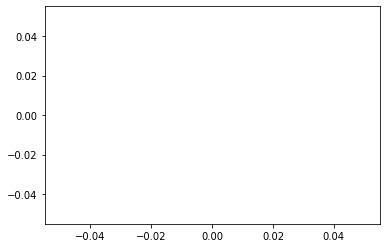

In [ ]:
Counter(list(df["state"]))

In [29]:
df[["tweet_id", "time", "combined_text", "state"]]

,tweet_id,time,combined_text,state
0,1223471140317909004,02-01-2020,Veteran journo canned after making ‘racist’ jo...,Tennessee
1,1223471149142560773,02-01-2020,UCSF expert working on quicker diagnostic test...,NaN
2,1223471417578139649,02-01-2020,RT @YahooFinance: Dr. Oz explains how to stay ...,New York
3,1223471598755368960,02-01-2020,Here's what did it. 👀👀👀👀👀👀\nCoronavirus? Bill ...,Texas
4,1223471814753443841,02-01-2020,#BREAKING @Qantas will suspend flights to and ...,Wisconsin
...,...,...,...,...
2317841,1421680845602050051,08-01-2021,- The locking up of children in cold tight qua...,Indiana
2317842,1421681168584478722,08-01-2021,@FoxNews As covid rages the state. Good one De...,Colorado
2317843,1421681267125460995,08-01-2021,@CoreyBrickley GIVE ME MOAR COVID JUICE,Pennsylvania
2317844,1421681374919024640,08-01-2021,Tuberculosis:The Forgotten Pandemic\nhttps://t...,New Jersey


In [30]:
df.tail(1)

,tweet_id,combined_text,time,favourites_count,followers_count,friends_count,statuses_count,rt_status,state,token_list
2317845,1421681713009332226,When you start to get loss of taste and smell ...,08-01-2021,12586.0,816.0,670.0,19875.0,0,Texas,"['start', 'loss', 'taste', 'smell', 'like', 's..."


In [ ]:
states = [i for i in df["state"]]

In [ ]:
Counter(states)

In [ ]:
states

In [3]:
df.isna().sum()

tweet_id             98304
combined_text       220030
time                507552
favourites_count    507552
followers_count     507552
friends_count       507552
statuses_count      507552
rt_status           507553
state               714745
token_list          507572
dtype: int64

In [8]:
df_new = df.dropna()

In [11]:
df_new[["tweet_id", "time", "combined_text", "state"]].reset_index().drop(["index"], axis=1)

,tweet_id,time,combined_text,state
0,1223471140317909004,02-01-2020,Veteran journo canned after making ‘racist’ jo...,Tennessee
1,1223471417578139649,02-01-2020,RT @YahooFinance: Dr. Oz explains how to stay ...,New York
2,1223471598755368960,02-01-2020,Here's what did it. 👀👀👀👀👀👀\nCoronavirus? Bill ...,Texas
3,1223471814753443841,02-01-2020,#BREAKING @Qantas will suspend flights to and ...,Wisconsin
4,1223471870151757825,02-01-2020,President @realDonaldTrump is taking measured ...,Hawaii
...,...,...,...,...
1603076,1421680845602050051,08-01-2021,- The locking up of children in cold tight qua...,Indiana
1603077,1421681168584478722,08-01-2021,@FoxNews As covid rages the state. Good one De...,Colorado
1603078,1421681267125460995,08-01-2021,@CoreyBrickley GIVE ME MOAR COVID JUICE,Pennsylvania
1603079,1421681374919024640,08-01-2021,Tuberculosis:The Forgotten Pandemic\nhttps://t...,New Jersey


# DATA FOR VACCINE

In [2]:
dff = pd.read_csv("owid-covid-data.csv")

In [13]:
dff.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [3]:
dff = dff[dff["location"] =="United States"]

In [15]:
dff.keys()

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [4]:
dfff = dff[["date", "new_cases_per_million", 'new_deaths_per_million', "new_vaccinations"]]
dfff

,date,new_cases_per_million,new_deaths_per_million,new_vaccinations
167987,2020-01-22,NaN,NaN,NaN
167988,2020-01-23,0.000,NaN,NaN
167989,2020-01-24,0.003,NaN,NaN
167990,2020-01-25,0.000,NaN,NaN
167991,2020-01-26,0.009,NaN,NaN
...,...,...,...,...
168794,2022-04-08,262.626,1.904,553560.0
168795,2022-04-09,38.601,0.832,238628.0
168796,2022-04-10,27.635,0.066,87495.0
168797,2022-04-11,130.886,0.967,37576.0


In [21]:
for i in range(len(dfff)):
    if dfff.iloc[i]["date"] == "2021-08-01":
        print(i)
        break

557


In [23]:
dfff[10:557].reset_index().drop("index",axis=1)

,date,new_cases_per_million,new_deaths_per_million,new_vaccinations
0,2020-02-01,0.000,NaN,NaN
1,2020-02-02,0.000,NaN,NaN
2,2020-02-03,0.009,NaN,NaN
3,2020-02-04,0.000,NaN,NaN
4,2020-02-05,0.000,NaN,NaN
...,...,...,...,...
542,2021-07-27,195.227,1.334,701654.0
543,2021-07-28,220.987,1.126,720765.0
544,2021-07-29,217.950,0.955,720900.0
545,2021-07-30,575.069,2.646,835778.0
